# NDVI Calculation

In [1]:
!python --version

Python 3.8.0


## Packages to install
!pip install rasterio  
!pip install rioxarray  
!pip install earthpy

## What is NDVI? 
NDVI is an indicator of vegetation health based on how plants reflect certain ranges of the electromagnetic spectrum 
* Cell structures in plants reflect the near-infrared (NIR) waves 
* This means that a healthy plant—one with a lot of chlorophyll and cell structures—actively absorbs red light and reflects NIR. An unhealthy plant will do the exact opposite 

## NDVI Formula
NDVI = (NIR-RED)/(NIR+RED)  
  
The value of the NDVI will always fall between -1 and +1  
The reason NDVI is formulated with red and near infrared is because red keys in on chlorophyll absorption, and near infrared is sensitive to canopy structure and the internal cellular structure of leaves 

## NDVI Calculation code

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
import rioxarray as rxr
import earthpy.spatial as es
import earthpy.plot as ep

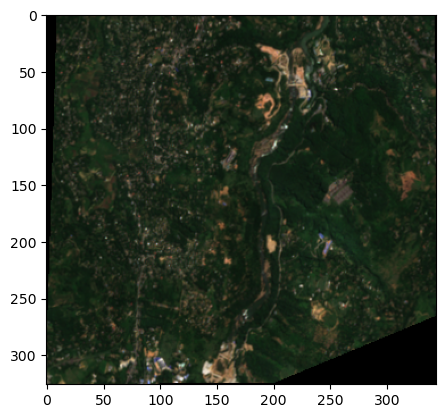

In [6]:
# Show true color img
img = plt.imread('./Data/Test1/2022-08-15-00_00_2022-08-15-23_59_Sentinel-2_L2A_True_color.tiff')
plt.imshow(img)
plt.show()

In [7]:
# Read red & NIR tiff files using rasterio
red_file = rxr.open_rasterio('./Data/Test1/2022-08-15-00_00_2022-08-15-23_59_Sentinel-2_L2A_B04_(Raw).tiff')
nir_file = rxr.open_rasterio('./Data/Test1/2022-08-15-00_00_2022-08-15-23_59_Sentinel-2_L2A_B08_(Raw).tiff')
print(red_file.shape)
print(nir_file.shape)

(1, 326, 344)
(1, 326, 344)


In [8]:
# Calculate NDVI for each pixel in image
ndvi = es.normalized_diff(nir_file[0], red_file[0])

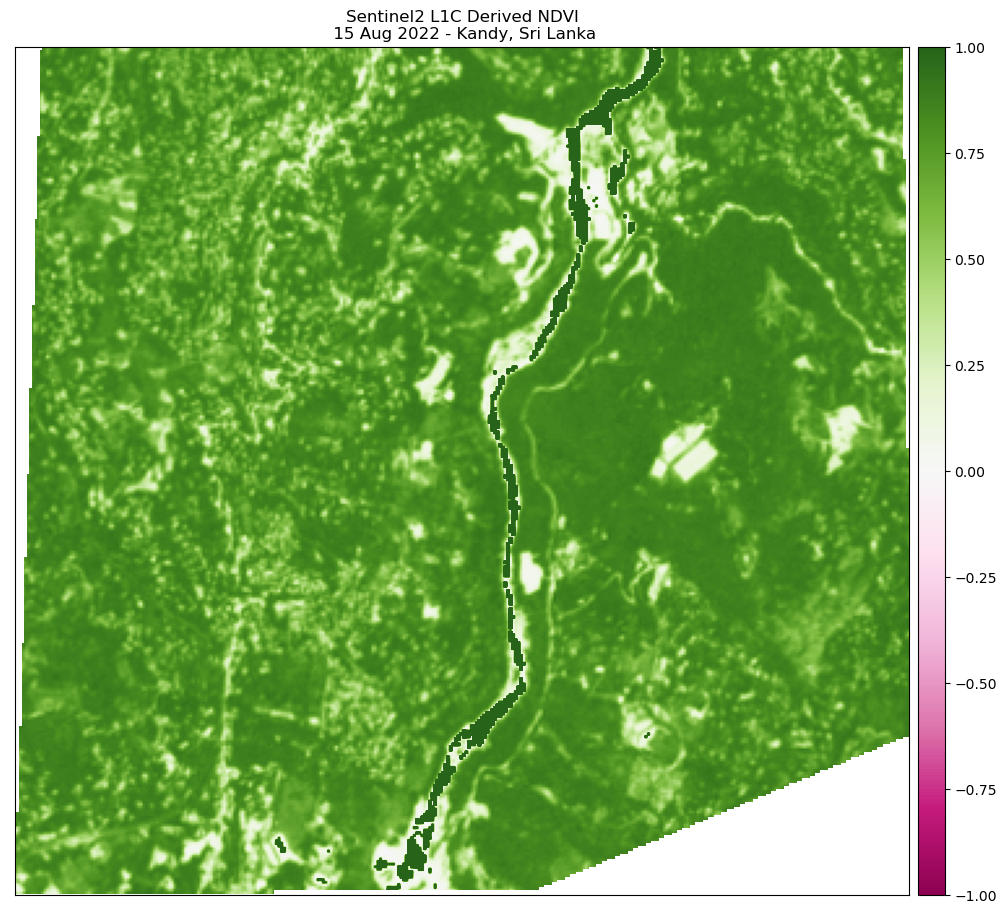

In [9]:
# Plot the NDVI
ep.plot_bands(ndvi,
              cmap='PiYG',
              scale=False,
              vmin=-1, vmax=1,
              title="Sentinel2 L1C Derived NDVI\n 15 Aug 2022 - Kandy, Sri Lanka")
plt.show()